<a href="https://colab.research.google.com/github/ParitoshMittal/Text-Classifier/blob/main/Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Classifier**

## Using TensorFlow 2.x

In [77]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Import Library**

In [78]:
import json
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import io

## Important Values

In [79]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


## **Load Dataset from json File**
https://storage.googleapis.com/learning-datasets/sarcasm.json

This dataset is **News Headlines Dataset** By **Rishabh Misra** from Keggle.

Dataset have three Key elements:
1. article_link
2. headline
3. is_sarcastic

In case we only needs headline and is_sarcastic. **headline** as our text and **is_sarcastic** as label.


### Create Sarcasm.json file in **Google Colab** Folder.

In [80]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2024-04-29 13:09:22--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2024-04-29 13:09:22 (77.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



### Load Data

In [81]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

### Divide the Data into Training and Testing Dataset.

In [82]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


## **Data Processing**

In [83]:
# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Index the Words
word_index = tokenizer.word_index

# Covert the Sentences into Sequences of Tokens and pad them

# For Train Data
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# For Test Data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [84]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## **Design Model**

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Train Model**

In [86]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6659 - accuracy: 0.5844 - val_loss: 0.5910 - val_accuracy: 0.6997 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4463 - accuracy: 0.8217 - val_loss: 0.3954 - val_accuracy: 0.8292 - 3s/epoch - 4ms/step
Epoch 3/30
625/625 - 5s - loss: 0.3207 - accuracy: 0.8732 - val_loss: 0.3617 - val_accuracy: 0.8445 - 5s/epoch - 7ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2681 - accuracy: 0.8957 - val_loss: 0.3635 - val_accuracy: 0.8371 - 4s/epoch - 6ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2325 - accuracy: 0.9111 - val_loss: 0.3439 - val_accuracy: 0.8583 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 4s - loss: 0.2055 - accuracy: 0.9222 - val_loss: 0.3465 - val_accuracy: 0.8547 - 4s/epoch - 6ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1836 - accuracy: 0.9322 - val_loss: 0.3625 - val_accuracy: 0.8502 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1655 - accuracy: 0.9374 - val_loss: 0.3678 - val_accuracy: 0.8541 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

## **Virtualization Data**

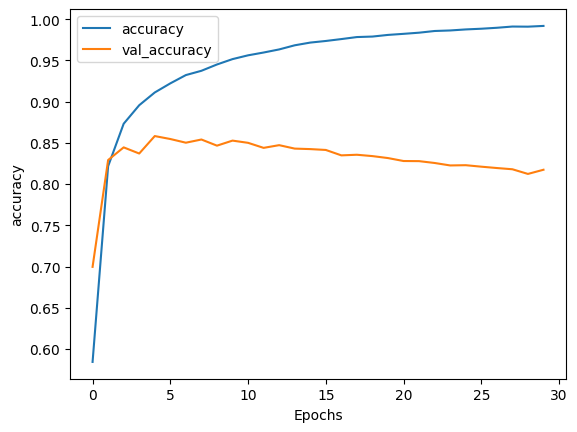

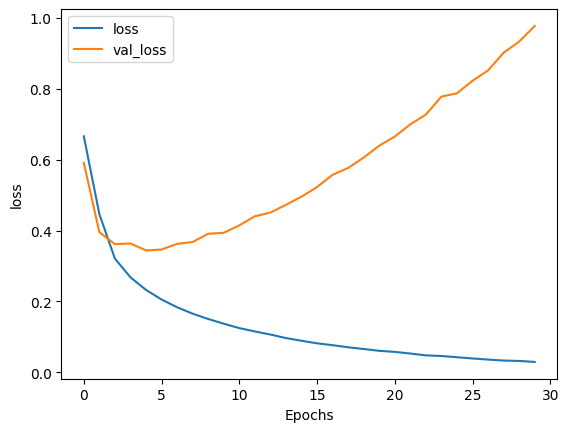

In [87]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [88]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [89]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


## Save Model

In [90]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

Download File

In [91]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Test Model

In [93]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 22ms/step
[[8.460346e-01]
 [7.988206e-06]]
